In [47]:
#default imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Specific Imports
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
ds=pd.read_csv("diabetes.csv")

In [3]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
ds["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
y=ds["Outcome"]
x=ds.drop(["Outcome"],axis=1)

In [6]:
ds.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
test=ds.tail(100)


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
x.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train,x_test,y_train,y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 603            7      150             78             29      126  35.2   
 118            4       97             60             23        0  28.2   
 247            0      165             90             33      680  52.3   
 157            1      109             56             21      135  25.2   
 468            8      120              0              0        0  30.0   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 192            7      159             66              0        0  30.4   
 629            4       94             65             22        0  24.7   
 559           11       85             74              0        0  30.1   
 684            5      136             82              0        0   0.0   
 
      DiabetesPedigreeFunction  Age  
 603                     0.692   54  
 118                  

In [14]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_lg=lg.predict(x_test)

In [16]:
y_lg

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [17]:
a=accuracy_score(y_test,y_lg)*100

In [18]:
a

82.46753246753246

In [19]:
def metrics(actuals,predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals,predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals,predictions)))
    print("Recalla: {:.5f}".format(recall_score(actuals,predictions)))
    print("f1_sore: {:.5f}".format(f1_score(actuals,predictions)))

In [20]:
print(metrics(y_test,y_lg.round()))

Accuracy: 0.82468
Precision: 0.76316
Recalla: 0.61702
f1_sore: 0.68235
None


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

In [22]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
prediction_rf=rf.predict(x_test)
rf_score=rf.score(x_test,y_test)*100

In [24]:
print(rf_score)

80.51948051948052


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [26]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
prediction_dt=dtc.predict(x_test)
dtc_score=dtc.score(x_test,y_test)*100

In [28]:
print(dtc_score)

80.51948051948052


In [29]:
from sklearn.neighbors import KNeighborsClassifier 
kn=KNeighborsClassifier(n_neighbors=5)

In [30]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
prediction_kn=kn.predict(x_test)
kn_score=kn.score(x_test,y_test)*100
kn_score

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

75.32467532467533

In [32]:
print(kn_score)

75.32467532467533


In [33]:
print(metrics(y_test,prediction_kn.round()))

Accuracy: 0.75325
Precision: 0.59184
Recalla: 0.61702
f1_sore: 0.60417
None


In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
adaboost=AdaBoostClassifier()

In [36]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [37]:
prediction_ab=adaboost.predict(x_test)

In [38]:
ab_score=adaboost.score(x_test,y_test)*100
ab_score

77.92207792207793

In [39]:
print(metrics(y_test,prediction_ab.round()))

Accuracy: 0.77922
Precision: 0.63265
Recalla: 0.65957
f1_sore: 0.64583
None


In [40]:
from sklearn.svm import SVC

In [41]:
svm=SVC()

In [42]:
svm.fit(x_train,y_train)

SVC()

In [43]:
prediction_svm=svm.predict(x_test)

In [44]:
svm_score=svm.score(x_test,y_test)*100
svm_score

79.22077922077922

In [45]:
print(metrics(y_test,prediction_svm.round()))

Accuracy: 0.79221
Precision: 0.72727
Recalla: 0.51064
f1_sore: 0.60000
None


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

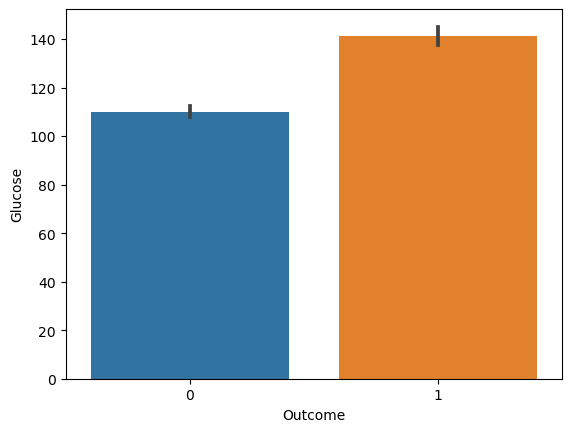

In [51]:
sns.barplot(x='Outcome',y='Glucose',data=ds)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

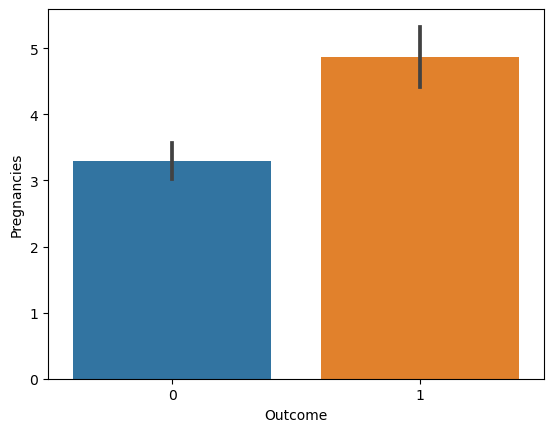

In [53]:
sns.barplot(x='Outcome',y='Pregnancies',data=ds)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

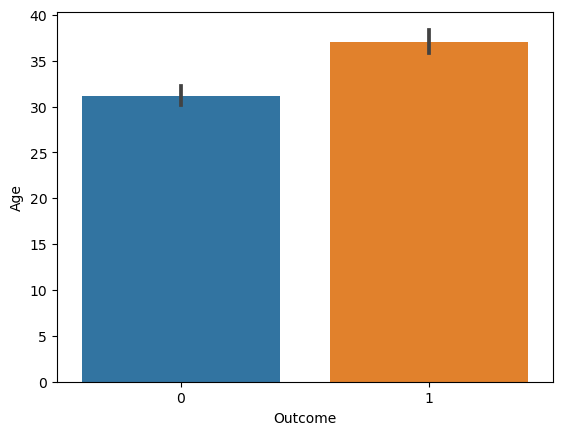

In [55]:
sns.barplot(x='Outcome',y='Age',data=ds)